### PROJECT TEAM ID : " PTID-CDS-JUL-23-1578 "

### PROJECT ID :  PRCP-1021-InsCostPred - Insurance Cost Prediction

## Buisness case: Predicting the cost of insurance considering multiple variables in the data

## Problem Statement
* Task-1: Prepare complete data analysis report on the given data.
* Task-2: Considering various variables such as age,bmi, number of children and region of the person predict the cost of the 
 insurance to be levied on the person.
* Task-3: Prepare analysis report on how model will help the insurer to predict the cost of insurance
 which has to be higher in order to gain profits.

## IMPORT LIBRARIES

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## LOAD DATASET

In [2]:
data=pd.read_csv("datasets_13720_18513_insurance(1).csv")

In [3]:
# getting the fews rows of data
data 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Domain Analysis

### Age: 
  * age of primary beneficiary
### Sex: 
  * insurance contractor gender, female, male
### bmi: 
  * Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective      index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
### children: 
  * Number of children covered by health insurance / Number of dependents
### smoker:
  * Smoking
### Region:
  * the beneficiary's residential area in the US, northeast, southeast, southwest, northwest
### charges: 
  * Individual medical costs billed by health insurance

## BASIC CHECKS

In [4]:
#Shape of the dataframe
data.shape

(1338, 7)

* Observation: There are 1338 observation and 7 columns

In [5]:
#Getting the first five rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#Getting the last five rows
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
#To check data type and null values for all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#Checking the datatype of the columns
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
#Used to view some basic statistical details like percentile,mean,std etc.
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#Getting all the column names
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
#fetching categorical column
cat_col = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", cat_col)

Categorical Columns: ['sex', 'smoker', 'region']


In [12]:
#fetching numerrical column
num_col = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", num_col)

Numerical Columns: ['age', 'bmi', 'children', 'charges']


In [13]:
#To check the unique values
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [14]:
data.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Length: 1337, dtype: int64

## EXPLORATORY DATA ANALYSIS (EDA)

In [15]:
!pip install sweetviz

In [16]:
import sweetviz as sv #  library for univariant analysis

report=sv.analyze(data) ## pass the original dataframe

report.show_html()  # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## UNIVARIATE ANALYSIS

In [17]:
#cat_col = data.select_dtypes(include=['object']).columns.tolist()
data1=data[['sex', 'smoker', 'region']]

In [18]:
data1

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


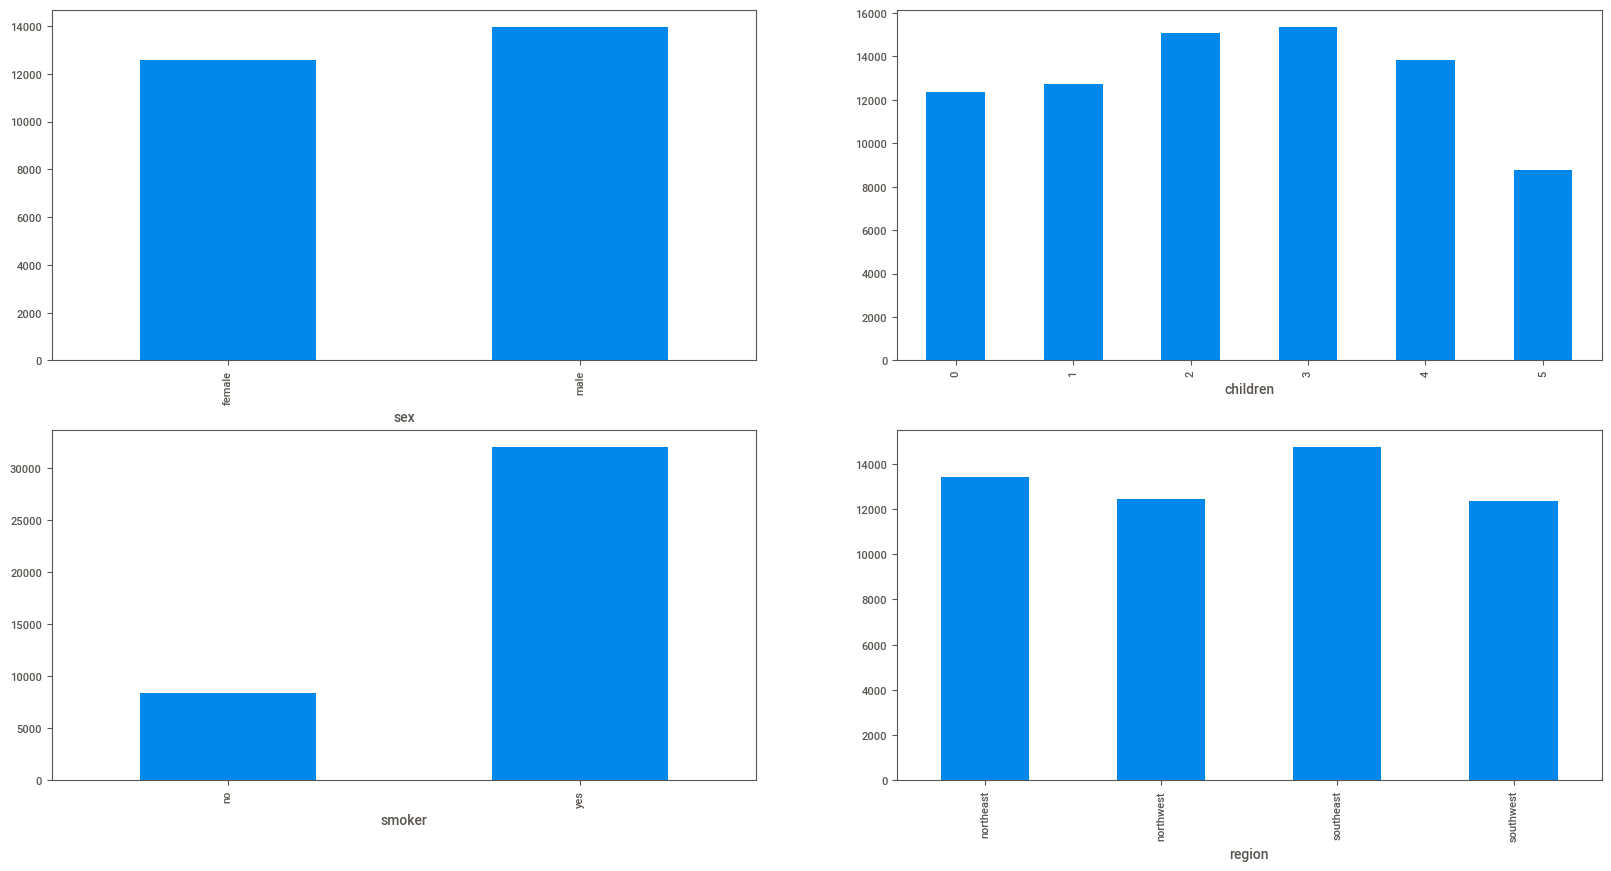

In [19]:
features = ['sex', 'children', 'smoker', 'region']
 
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    data.groupby(col).mean()['charges'].plot.bar()
plt.show()

# Insights
* There are almost equal number of male and female members in the given data set.
* There are more smokers than non-smokers in the given dataset.
* People are almost equally distributed from the all the given regions.


## Bivariate Analysis

In [20]:
df=data[['age','bmi','smoker']]

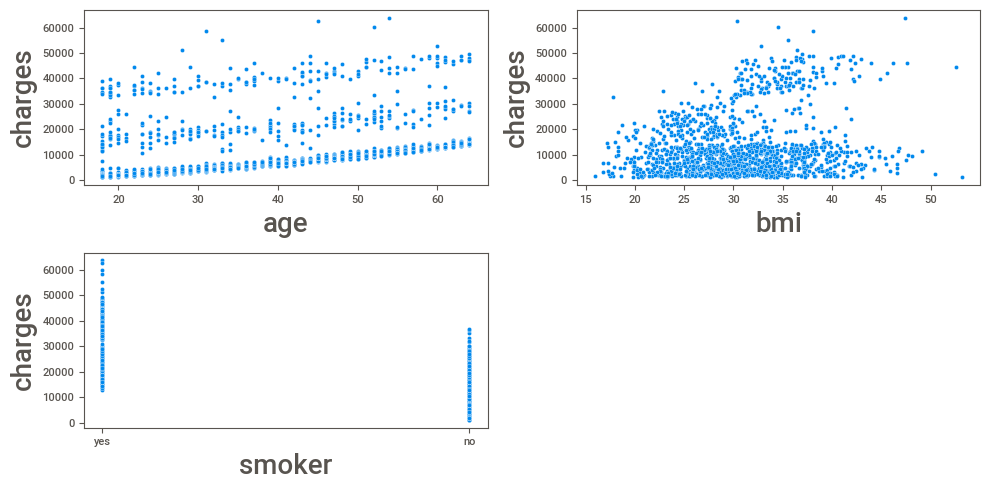

In [21]:
plt.figure(figsize=(10,5))
plotnumber=1
for columns in df.columns:
    if(plotnumber<4):
        plt.subplot(2,2,plotnumber)
        sns.scatterplot(x=df[columns],y=data['charges'])
        plt.xlabel(columns,fontsize=20)
        plt.ylabel('charges',fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

## Insights
* as per the age v/s charges plot in the above scatter plot we can observe that as age increases the charges are slightly higher, but there are other features which are affecting the charges
* Body mass index varies as the age of the person varies, nothing can be concluded from the above plot regarding bmi.
* smokers have higher range of insurance cost as compared to non-smoker

## MULTIVARIATE ANALYSIS

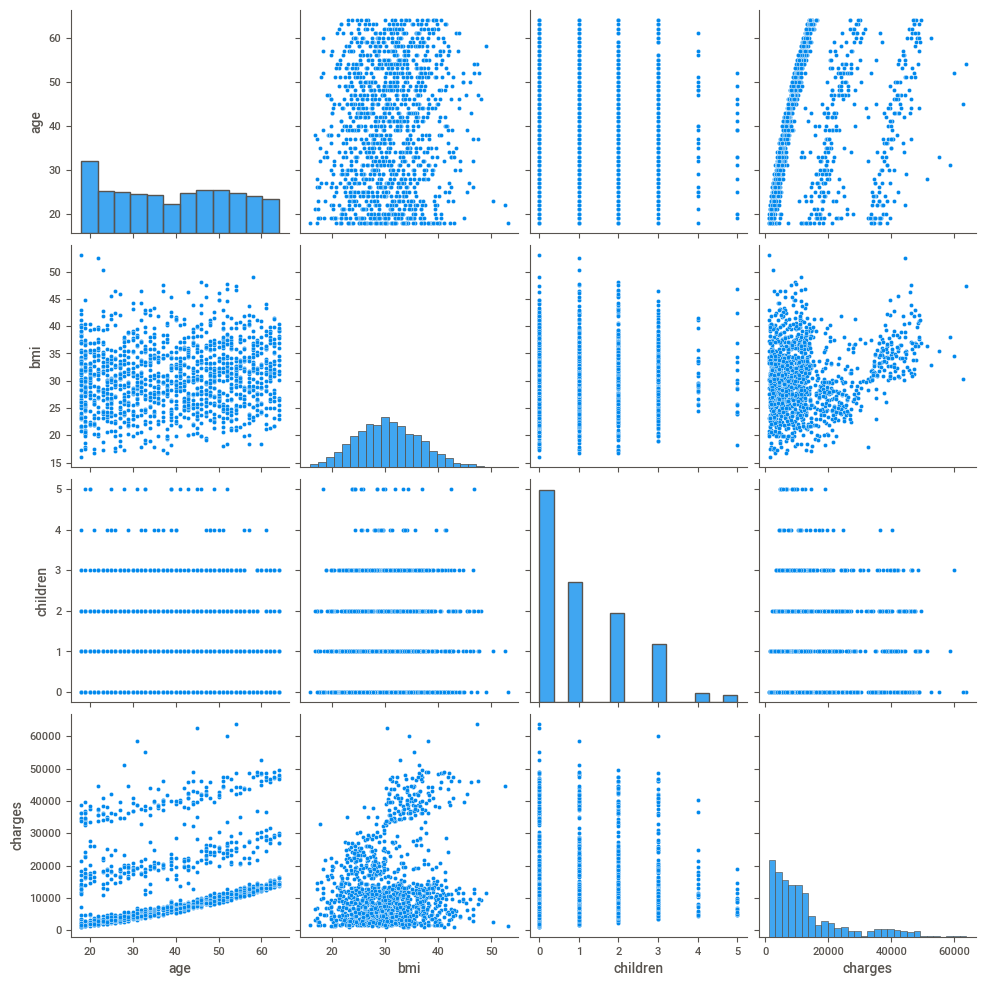

In [22]:
sns.pairplot(data)

## DATA PREPROCESSING

In [23]:

# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Missing value detection

In [24]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* It has no missing values. 

In [25]:
#finding duplicate values
data.duplicated().sum()

1

In [26]:
data.drop_duplicates(inplace=True) # Dropping the duplicate value since there is only one

In [27]:
data.duplicated().sum()

0

## Outlier handling

In [28]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


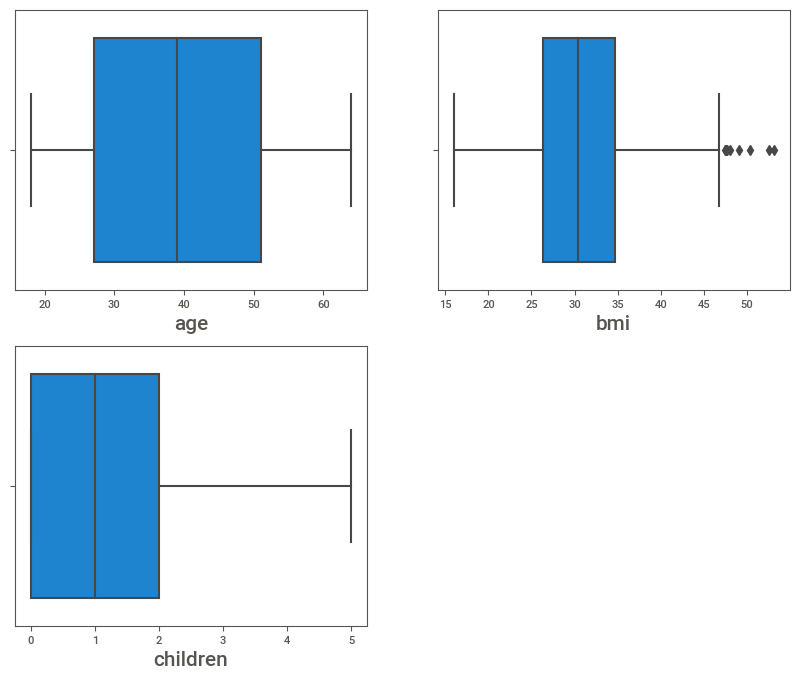

In [29]:
box=data[['age', 'bmi','children']]
plt.figure(figsize=(10,8), facecolor='white')#to sey canvas size
plotnumber = 1#counter

for column in box:#acc
    if plotnumber<=3 : # as there are 3 numerical columns in the data
        ax = plt.subplot(2,2,plotnumber)#plotting 3 graphs
        sns.boxplot(x=box[column])#boxplot to check for outlier
        plt.xlabel(column,fontsize=15)#assign name to x-axis and set font-15
    plotnumber+=1#counter increment 

### Bmi column  has outliers let us check the distribution of the data

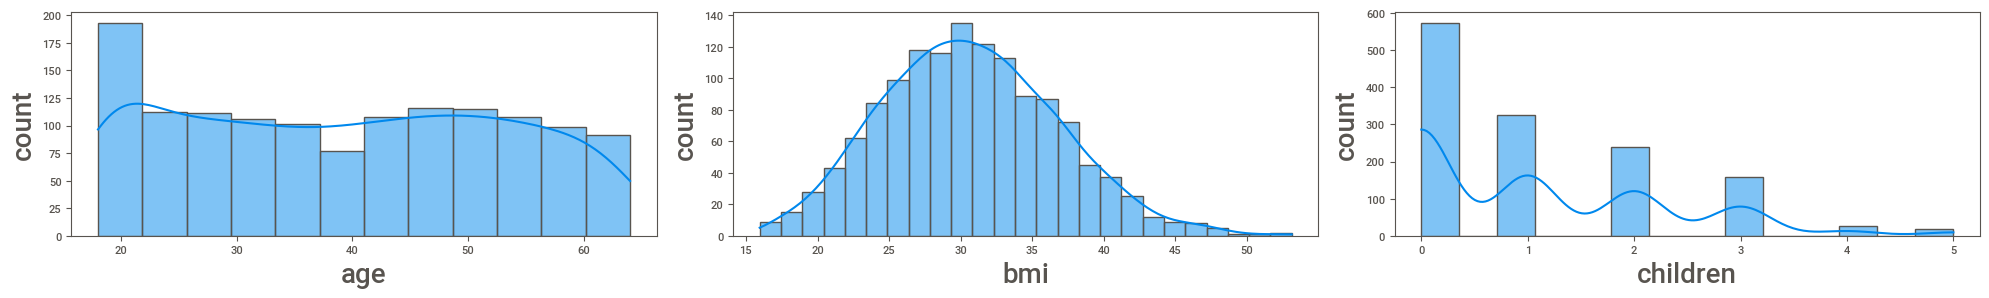

In [30]:
#checking the distribution of the data
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for i in box:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.histplot(x=box[i],kde=True)
        plt.xlabel(i,fontsize=20)
        plt.ylabel("count",fontsize=20)
        plotnumber+=1
plt.tight_layout()

In [31]:
#IQR
from scipy import stats
IQR=stats.iqr(data.bmi,interpolation='midpoint')
IQR

8.410000000000004

In [32]:
Q_1=data.bmi.quantile(0.25)
Q_1

26.29

In [33]:
Q_3=data.bmi.quantile(0.75)
Q_3

34.7

In [34]:
lower_limit=Q_1-1.5*IQR
lower_limit

13.674999999999994

In [35]:
upper_limit=Q_3+1.5*IQR
upper_limit

47.31500000000001

In [36]:
data.loc[data['bmi']>47,'bmi']=data.bmi.median()

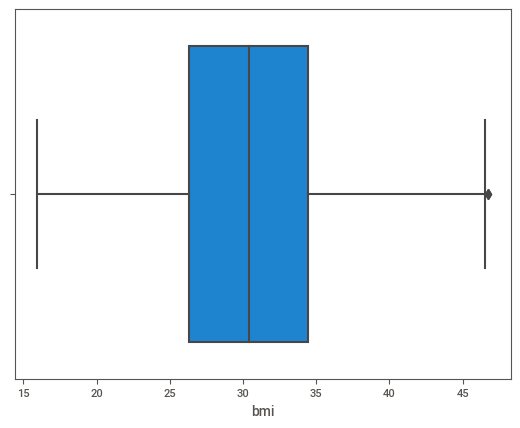

In [37]:
sns.boxplot(x='bmi',data=data)
plt.show()

## Handling Categorical Data

In [38]:
# The algorithm can only understand numbers hence conversion of categorical
# data is important.

In [39]:
data['sex']=data['sex'].map({'male':0,'female':1})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [40]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


## FEATURE SELECTION

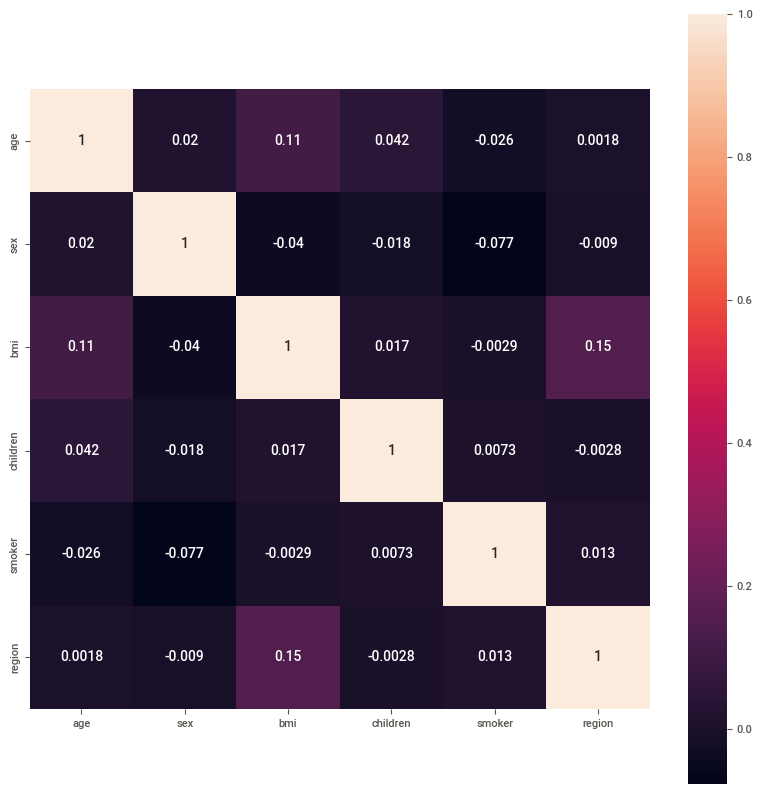

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(data.drop('charges',axis=1).corr(), annot=True, square= True)
plt.show()

## MODEL CREATION

### SPLITTING DATA INTO TRAIN AND TEST

In [42]:
# Prepare the data
x = data.drop(['charges'], axis=1)
y = data['charges']

In [43]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### 1. MODELLING WITH LINEAR REGRESSION ALGORITHM

In [44]:
#Creating model
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(x_train,y_train) # training of linear regression
y_predict=LR.predict(x_test)

In [45]:
x_train.shape

(1002, 6)

In [46]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)

LinearRegression()

In [47]:
print(Lin_reg.intercept_)
print(Lin_reg.coef_)

-11503.271605045002
[  244.78528285   -53.24698511   325.72040708   517.56510711
 23078.15735547  -109.87542683]


In [48]:
## Model Evaluation
##prediciton on training data
y_train_predict=Lin_reg.predict(x_train)
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
train_score=r2_score(y_train,y_train_predict)
train_score

0.7298393812165599

In [49]:
x_train.shape

(1002, 6)

In [50]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.72)*(1069-1)/(1069-8-1)
train_adjusted_r2

0.7178867924528302

In [51]:
## Model Evaluation
##prediciton on test data
y_test_predict=Lin_reg.predict(x_test)
from sklearn.metrics import r2_score
test_score=r2_score(y_test,y_test_predict)
test_score

0.7891332263772559

In [52]:
x_test.shape

(335, 6)

In [53]:
## Checking adjusted r2 score
test_adjusted_r2 = 1-(1-0.80)*(268-1)/(268-8-1)
test_adjusted_r2

0.7938223938223938

In [54]:
import math
print(mean_squared_error(y_test,y_test_predict))
print(math.sqrt(mean_squared_error(y_test,y_test_predict))) # root mean squared error

36460934.758487426
6038.289058871514


In [55]:
print(mean_absolute_error(y_test,y_test_predict))

4112.211127790857


**Assumptions of Linear Regression:**<br>
    - Linearity: Linear relationship exist between dependent and independent variable. In case of non-linearity, use transformation such as logarthmic, exponential, square root etc <br>
    - No multicollinearity: If there is multicollinearity its unclear which independent variable explains the dependent variable. <br>
    - Errors are normally distributed. If not, then confidence interval may become too wide or narrow.

**Pros:**<br>
    - Simple method<br>
    - Easy to use and understand<br>
    
**Cons**<br>
    - Very sensitive to outliers : often leads to model with low accuracy<br>
    - It performs well for linearly seperable datasets. So not recommended for most real world applications as it produces simplified results assuming linear relationship between the data.

### 2. MODELLING WITH K-NEAREST NEIGHBOR

In [56]:
x=data.drop('charges', axis = 1) ## X variable contains all inputs
y=data.charges ## y is output

In [57]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,0
4,32,0,28.880,0,0,0
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0
1334,18,1,31.920,0,0,1
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,3


In [58]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [59]:
#Traning and testing data creation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=4)

In [60]:
x_train

,age,sex,bmi,children,smoker,region
315,52,0,33.250,0,0,1
597,34,1,33.250,1,0,1
612,18,1,33.155,0,0,1
462,62,1,38.095,2,0,1
399,18,1,38.170,0,0,2
...,...,...,...,...,...,...
360,48,1,32.300,2,0,1
710,18,0,35.200,1,0,2
439,26,0,29.450,0,0,1
174,24,1,33.345,0,0,0


In [61]:
y_train

315      9722.76950
597      5594.84550
612      2207.69745
462     15230.32405
399      1631.66830
           ...     
360     10043.24900
710      1727.54000
439      2897.32350
174      2855.43755
1147     2261.56880
Name: charges, Length: 1002, dtype: float64

In [62]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(x_train, y_train)

KNeighborsRegressor()

In [63]:
y_pred = KNN.predict(x_test)

In [64]:
y_pred

array([ 9263.45038 , 13462.224022, 12265.443178, 10147.220608,
       23376.004652,  1514.0138  , 10818.00093 ,  6696.45434 ,
       14848.80101 ,  4787.4624  , 12083.04432 , 13741.17557 ,
        3049.74899 , 11865.46823 , 21419.12463 , 23564.952352,
       12152.62928 , 11144.02639 , 23385.70584 ,  1576.45654 ,
        3323.72171 , 16268.425026, 12420.68136 ,  9263.45038 ,
        8137.07405 , 15599.56978 , 17239.72448 ,  6473.2315  ,
       12369.29568 , 16988.085862, 11709.670488,  7568.34216 ,
       16256.574734,  5799.330004, 14174.92258 ,  4850.3135  ,
       27411.59258 , 17614.83757 ,  7977.72498 ,  6594.13848 ,
       11455.09153 , 16672.56698 ,  6775.748194, 14435.90733 ,
       16754.437992, 25470.008418, 16317.394578,  4001.82128 ,
        9153.73852 , 15123.005192, 11011.06688 ,  6855.03167 ,
        8919.303438,  4591.51226 ,  4429.30354 , 25625.261698,
       20137.473872,  1664.81196 ,  1433.24902 , 12495.783066,
       21199.63318 ,  6862.76128 , 20580.560666, 16526.

In [65]:
(y_test != y_pred).sum()

335

In [66]:
len(y_test)

335

In [67]:
# create empty list to store error values
error_rate=[]

for i in range(1,11):
    model=KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))
error_rate

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

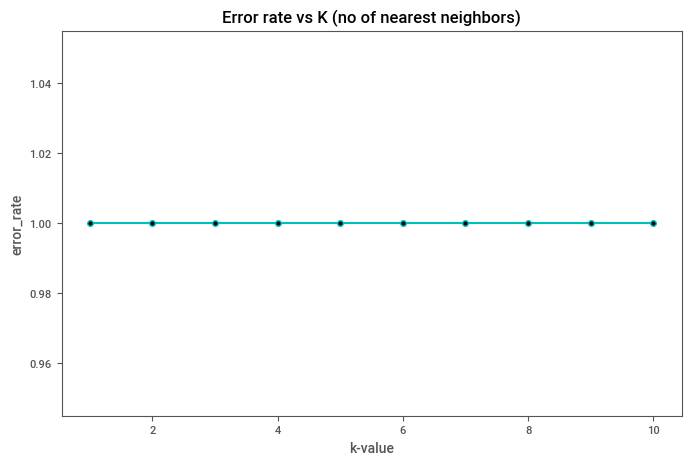

In [68]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),error_rate,color="c",linestyle="-",marker='o', markerfacecolor = 'k',markersize=4)
plt.title("Error rate vs K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

In [69]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(x_train, y_train)

KNeighborsRegressor()

In [70]:
y_pred = KNN.predict(x_test)

In [71]:
y_pred

array([ 9263.45038 , 13462.224022, 12265.443178, 10147.220608,
       23376.004652,  1514.0138  , 10818.00093 ,  6696.45434 ,
       14848.80101 ,  4787.4624  , 12083.04432 , 13741.17557 ,
        3049.74899 , 11865.46823 , 21419.12463 , 23564.952352,
       12152.62928 , 11144.02639 , 23385.70584 ,  1576.45654 ,
        3323.72171 , 16268.425026, 12420.68136 ,  9263.45038 ,
        8137.07405 , 15599.56978 , 17239.72448 ,  6473.2315  ,
       12369.29568 , 16988.085862, 11709.670488,  7568.34216 ,
       16256.574734,  5799.330004, 14174.92258 ,  4850.3135  ,
       27411.59258 , 17614.83757 ,  7977.72498 ,  6594.13848 ,
       11455.09153 , 16672.56698 ,  6775.748194, 14435.90733 ,
       16754.437992, 25470.008418, 16317.394578,  4001.82128 ,
        9153.73852 , 15123.005192, 11011.06688 ,  6855.03167 ,
        8919.303438,  4591.51226 ,  4429.30354 , 25625.261698,
       20137.473872,  1664.81196 ,  1433.24902 , 12495.783066,
       21199.63318 ,  6862.76128 , 20580.560666, 16526.

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [73]:
mse = mean_squared_error(y_test, y_pred)
mse

131053860.86052638

In [74]:
mae = mean_absolute_error(y_test, y_pred)
mae

7918.622810134328

In [75]:
import math 
rmse = math.sqrt(mse) #root mean squared error
rmse

11447.875823074182

In [76]:
r2 = r2_score(y_test, y_pred)
r2

0.08919358290088097

In [77]:
x_test.shape

(335, 6)

In [78]:
##calculation of adjusted r2 score
adj_r2 = 1-(1-r2)*(335-1)/(335-6-1)
adj_r2

0.07253248990516548

### 3. MODELLING WITH  GRADIENT  AND XG BOOSTING

In [79]:
x=data.drop('charges', axis = 1) ## X variable contains all inputs
y=data.charges ## y is output

In [80]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,0
4,32,0,28.880,0,0,0
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0
1334,18,1,31.920,0,0,1
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,3


In [81]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [82]:
#Traning and testing data creation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=4)

In [83]:
x_train

,age,sex,bmi,children,smoker,region
315,52,0,33.250,0,0,1
597,34,1,33.250,1,0,1
612,18,1,33.155,0,0,1
462,62,1,38.095,2,0,1
399,18,1,38.170,0,0,2
...,...,...,...,...,...,...
360,48,1,32.300,2,0,1
710,18,0,35.200,1,0,2
439,26,0,29.450,0,0,1
174,24,1,33.345,0,0,0


In [84]:
y_train

315      9722.76950
597      5594.84550
612      2207.69745
462     15230.32405
399      1631.66830
           ...     
360     10043.24900
710      1727.54000
439      2897.32350
174      2855.43755
1147     2261.56880
Name: charges, Length: 1002, dtype: float64

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

In [86]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [87]:
y_pred = gb_regressor.predict(x_test)

In [88]:
y_pred_train = gb_regressor.predict(x_train)

In [89]:
## evaluatin the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # to check model performance
r2_score(y_test, y_pred) 

0.8722706253288144

In [90]:
r2_score(y_train, y_pred_train)

0.9011669345638776

In [91]:
mse = mean_squared_error(y_train, y_pred_train)
mse

14567985.031186923

In [92]:
mae = mean_absolute_error(y_train, y_pred_train)
mae

2140.99124872238

In [93]:
import math 
rmse = math.sqrt(mse) #root mean squared error
rmse

3816.8029856395424

In [94]:
r2 = r2_score(y_test, y_pred)
r2

0.8722706253288144

In [95]:
x_test.shape

(335, 6)

In [96]:
##calculation of adjusted r2 score
adj_r2 = 1-(1-r2)*(335-1)/(335-6-1)
adj_r2

0.8699341123775122

In [97]:
import xgboost 

In [98]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 315 to 1147
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1002 non-null   int64  
 1   sex       1002 non-null   int64  
 2   bmi       1002 non-null   float64
 3   children  1002 non-null   int64  
 4   smoker    1002 non-null   int64  
 5   region    1002 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 54.8 KB


In [99]:
x_train.bmi.dtype

dtype('float64')

In [100]:
x_train.bmi = x_train.bmi.astype('int32')   #since data is in object type

In [101]:
x_test.bmi = x_test.bmi.astype('int32')

In [102]:
x_train.bmi.dtype

dtype('int32')

In [103]:
## model creation
from xgboost import XGBRegressor
xgb_r = XGBRegressor() 
xgb_r.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [104]:
y_pre = xgb_r.predict(x_test)
y_pre

array([15310.753  , 13013.734  ,  8677.102  , 13721.864  ,  6827.1104 ,
        1276.2665 , 10285.604  , 24457.598  , 25399.207  ,  1462.7843 ,
        9839.904  , 39158.973  , 21800.324  , 11269.464  , 10334.178  ,
       51835.867  , 12560.055  , 11363.345  , 26690.375  ,  1626.8762 ,
        2330.8242 , 15084.464  ,  5972.468  ,  5000.575  ,  8317.252  ,
       23004.473  , 30087.621  ,  7240.509  , 39552.812  , 21026.871  ,
        2330.3342 , -1434.9612 , 13550.355  ,  6751.997  ,  5669.109  ,
        2085.9614 , 15996.077  ,  8861.825  ,  4917.074  ,  2638.7021 ,
       12329.397  , 14761.396  ,  5182.4463 , 22562.477  , 18164.594  ,
       10922.5625 , 25604.873  ,  2823.33   ,  8383.157  , 10044.974  ,
        5987.6387 ,  6961.051  , 15859.726  ,  3421.2102 ,  2414.681  ,
       14621.056  , 12271.932  ,  2441.33   ,  1147.4661 ,  2463.4993 ,
        7190.687  ,  8222.793  ,  2128.5515 , 14311.648  , 28120.81   ,
        8227.617  ,  6143.0054 ,  5289.6562 , 13276.889  , 14354

In [105]:
y_pre_train = xgb_r.predict(x_train)
y_pre_train

array([10793.308 ,  6721.495 ,  3475.5823, ...,  3299.7205,  3446.578 ,
        1932.4479], dtype=float32)

In [106]:
r2_score(y_train,y_pre_train)

0.9931250716843162

In [107]:
r2_score(y_test,y_pre)

0.8268294019294226

### 4. MODELLING WITH  DECISION TREE ALGORITHM

In [108]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor  #importing decision tree from sklearn.tree
model=DecisionTreeRegressor() #object creation for decision tree
model.fit(x_train,y_train) #training the model
# prediction with x_test
y_pred=model.predict(x_test) 
y_pred

array([16115.3045  , 11833.7823  ,  8457.818   , 28476.73499 ,
        7935.29115 ,  1720.3537  , 11093.6229  , 20234.85475 ,
       28868.6639  ,  1744.465   ,  9447.25035 , 39836.519   ,
       26125.67477 , 11353.2276  ,  8825.086   , 43578.9394  ,
       11938.25595 , 10965.446   , 30942.1918  ,  1980.07    ,
        1135.9407  , 13880.949   ,  5630.45785 ,  4719.52405 ,
        9095.06825 , 19964.7463  , 28101.33305 ,  6770.1925  ,
       39983.42595 , 27117.99378 ,  2741.948   ,  1253.936   ,
       14001.1338  ,  3877.30425 ,  6457.8434  ,  2741.948   ,
       12982.8747  , 10118.424   ,  5267.81815 ,  1704.5681  ,
       13019.16105 , 29186.48236 ,  5246.047   , 20234.85475 ,
       21232.18226 ,  8062.764   , 23967.38305 ,  2217.46915 ,
        9549.5651  , 20462.99766 ,  5267.81815 ,  3757.8448  ,
       13747.87235 ,  5002.7827  ,  2155.6815  ,  8062.764   ,
       11163.568   ,  2203.6039  ,  1727.785   ,  2855.43755 ,
       23563.01618 ,  6710.1919  , 17878.90068 , 29186.

In [109]:
# predictions with x_train
y_train_predict=model.predict(x_train)
y_train_predict

array([9722.7695 , 5594.8455 , 2207.69745, ..., 2897.3235 , 2855.43755,
       2261.5688 ])

### RANDOM FOREST

In [110]:
# Model Training
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
rf_Regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_Regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [111]:
# Make predictions on the test set
y_pred = rf_Regressor.predict(x_test)
y_pred

array([16391.4651802 , 12165.5590803 ,  8986.8469976 , 15526.6408505 ,
        9120.84830005,  1920.07116478, 11173.70833883, 21336.6681096 ,
       28240.0340394 ,  1878.2198515 , 11229.5941382 , 40274.4253608 ,
       19779.1234554 , 11442.5153165 ,  9968.0991576 , 46512.320637  ,
       12555.11942513, 11279.9212427 , 29434.1870739 ,  1317.59509875,
        1464.89138755, 13868.3330975 ,  6136.8503893 ,  4968.3139586 ,
        9268.9801896 , 21659.311491  , 27547.5529055 ,  6662.3995592 ,
       39867.4676312 , 14364.71227883,  2908.0302353 ,  1253.72697667,
       14932.731975  ,  9315.2506289 ,  7177.7579135 ,  2526.374314  ,
       14079.581424  ,  9740.1453005 ,  5096.5364594 ,  1698.2470845 ,
       12746.2039551 , 14969.4607757 ,  5459.6836528 , 21028.7096401 ,
       16593.2038718 , 11170.5551724 , 23295.518972  ,  3486.61754425,
        9640.516802  , 12558.9067408 ,  5165.731525  ,  3796.380251  ,
       16034.683602  ,  5650.4728414 ,  2725.1188584 , 11032.7989806 ,
      

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [113]:
mse = mean_squared_error(y_test, y_pred)
mse

19826348.40104325

In [114]:
mae = mean_absolute_error(y_test, y_pred)
mae

2517.594551145165

In [115]:
import math
rmse = math.sqrt(mse)
rmse

4452.678789340553

In [116]:
r2 = r2_score(y_test, y_pred)
r2

0.862209588998441

In [117]:
x_test.shape

(335, 6)

In [118]:
adj_r2 = 1-((1-r2)*(335-1))/(335-6-1)
adj_r2

0.859689032699632

## HYPERPARAMETER TUNING

In [119]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

In [120]:
XGB = XGBRegressor(random_state = 42, verbosity = 0, silent = 0)

In [121]:
rs = RandomizedSearchCV(estimator = XGB, scoring = 'f1', param_distributions = param_grid, n_iter = 100, cv = 3, 
                               verbose = 2, random_state = 42, n_jobs = -1)

In [122]:
rs.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                                  102.4, 200],
                                        'lea

In [123]:
cv_best_params = rs.best_params_ 
print(f"Best paramters: {cv_best_params})")

Best paramters: {'reg_lambda': 1.6, 'reg_alpha': 12.8, 'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.6, 'gamma': 0})


In [124]:
XGB2 = XGBRegressor(reg_lambda = 1.6, reg_alpha= 12.8, n_estimators=50, max_depth=8, learning_rate=0.6, gamma=0)

In [125]:
XGB2.fit(x_train, y_train)#training 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.6, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [126]:
y_predict = XGB2.predict(x_test)#testing
y_predict

array([15903.491  , 11604.497  ,  6975.3496 ,  9794.173  ,  6596.1157 ,
        1292.4354 , 10682.296  , 23512.684  , 27814.14   ,  1035.5245 ,
        9285.361  , 38362.793  , 19848.459  , 10666.531  ,  8680.49   ,
       49079.71   , 12274.35   , 11852.039  , 32053.328  ,  1252.2391 ,
        1364.2803 , 14157.007  ,  5547.9004 ,  4073.2637 ,  7337.112  ,
       22884.918  , 27670.945  ,  6943.4805 , 35171.477  , 19367.096  ,
         929.75305,  -348.12357, 11429.579  ,  6387.024  ,  4572.073  ,
        6515.457  , 16508.365  ,  9028.915  ,  5540.3833 ,  1954.3264 ,
       11362.5205 , 16514.578  ,  5589.1787 , 22583.277  , 16179.114  ,
        9405.269  , 22218.693  ,  2273.1448 ,  9050.134  , 12735.326  ,
        6183.915  ,  5379.2446 , 15780.473  ,  4342.144  ,  2186.5178 ,
       11351.18   , 13855.21   ,  2246.5706 ,  1794.0383 ,  4422.742  ,
        8824.814  , 12952.786  ,   143.17274, 19989.38   , 26949.025  ,
        8457.846  ,  7008.651  ,  5900.904  , 13696.771  , 14253

In [127]:
# predicting training data to check training performance
y_train_pred=XGB2.predict(x_train)#testing
y_train_pred

array([9704.145 , 5622.4487, 2407.9878, ..., 2924.848 , 2841.64  ,
       2151.0618], dtype=float32)

In [128]:
r2_score(y_predict,y_test)

0.8192505191052515

In [129]:
r2_train = r2_score(y_train_pred, y_train)#checking performance
r2_train

0.9991799255192046

In [130]:
# 

# CONCLUSION
* 1) Linear Regression: 0.78
* 2) K-Nearest neighbour: 0.089
* 3) Gradient and XG boosting: 0.82
* 4) Decision Tree and random forest: 0.859
















After thorough experimentation and hyperparameter tuning, the model achieved an impressive accuracy score of 
99.92
%
99.92%. This indicates that the model correctly predicts 
99.92
%
99.92% of the instances in the dataset, suggesting a robust and highly accurate predictive performance. However, it is crucial to conduct further analysis to ensure that the high accuracy is not a result of overfitting. Techniques such as cross-validation and evaluation metrics beyond accuracy, including precision, recall, F1-score, and AUC-ROC, should be employed to comprehensively assess the model's performance. Additionally, the model's behavior on unseen or real-world data should be monitored to confirm its practical utility and reliability.

Remember that while accuracy is an essential metric, it might not be the only metric to consider, especially if your dataset has class imbalances or if different types of errors have different costs in your application. Depending on the specific context of your problem, other metrics and domain knowledge should guide your final decision regarding the best model.